<h1> <i>Linear Regression and Regularization.</i> </h1>

<p>"CLV.xlsx" dataset is used to analyze <b>Customer lifetime value</b> by using linear regression and regularization methods. The dependent variable which to be used in models is <b>Customer lifetime value</b>. 

In [1]:
import numpy as np
import pandas as pd
import time, warnings
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error 
from statsmodels.api import qqplot 
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow  
from scipy.stats import shapiro 

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV,ElasticNet, ElasticNetCV
import seaborn as sns #visualization

 <h2>1.Data Diagnostics</h2> <a name="part1"></a>

<u>Get insightful information of features by <br> </u>
1.Identify how many observations and features are presented, how many of them are numeric and categorical <br>
2.How many observations have not available values <br>
3.Main statistics of the numeric features <br>
4.Checking if there are duplicated observation <br>
5.Removing "Customer"and "Effective_To_Date" columns from dataset <br>

In [2]:
df = pd.read_excel("CLV.xlsx")
df.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   State                          9134 non-null   object        
 2   Customer_Lifetime_Value        9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective_To_Date              9134 non-null   datetime64[ns]
 7   EmploymentStatus               9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9134 non-null   int64         
 10  Location_Code                  9134 non-null   object        
 11  Marital_Status   

In [4]:
print("Number of NA values:", df.isna().sum().sum())

Number of NA values: 0


In [5]:
print(df.describe())

       Customer_Lifetime_Value        Income  Monthly_Premium_Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months_Since_Last_Claim  Months_Since_Policy_Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000              

In [6]:
print("Checking the duplicates", df.duplicated().sum())

Checking the duplicates 0


In [7]:
df = df.drop(columns = ["Customer", "Effective_To_Date"])
print(df.shape)

(9134, 22)


 <h2>2.Descriptive analysis with visualization </h2> <a name="pandas"></a>

1.Plot the Customer Life Time value distribution, interpret the result <br>
2.Plot a boxplot of CVL for Emploment status, does the CVL differ between subcategories? <br>
3.Show the relationship between CLV and Income, interpret the result <br>
4.Check the multicollinearity between the features, interpret the results <br>
5.Use sns.pairplot function to plot the relationship between variables, based on 5 and 4 points make recommendation <br>

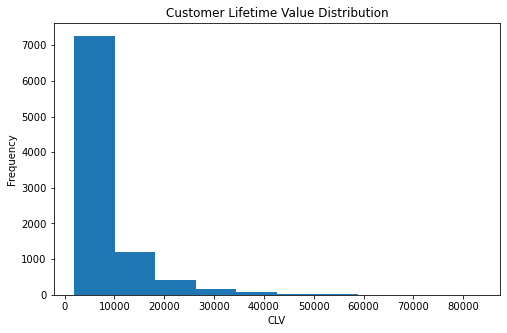

In [8]:
plt.figure(figsize = (8, 5))
plt.hist(df["Customer_Lifetime_Value"])
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.show()

The plot is right skewed. There are a lot of customers, more that 7,000, that have CLV which lies in the range 0 - 10,000. The rest(a few customers), have higher CLV.

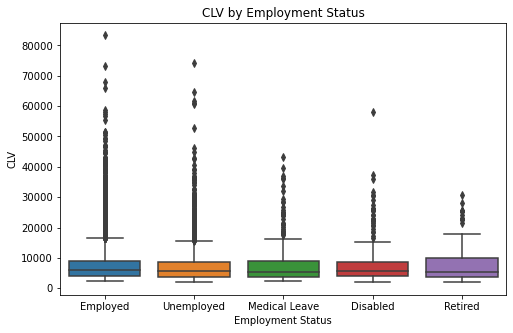

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = df["EmploymentStatus"], y = df["Customer_Lifetime_Value"])
plt.title('CLV by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('CLV')
plt.show()

The median CLV values are approximately the same for all categories. However, Employed and Unemployed have more outliers.

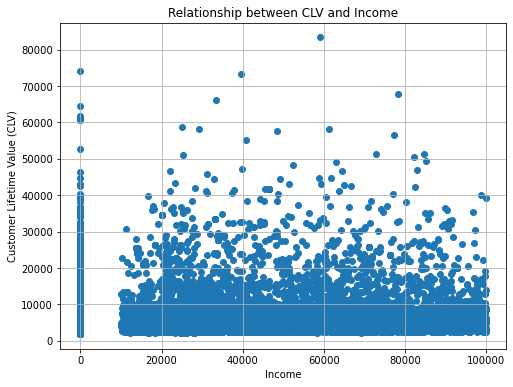

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Income'], df['Customer_Lifetime_Value'])
plt.title('Relationship between CLV and Income')
plt.xlabel('Income')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.grid(True)
plt.show()

Customers with higher income tend to have a broader range of CLV values. However, the plot doesn't show any strong relationship between two variables.

In [12]:
# Checking for correlations (multicollinearity)
data_numeric = df.select_dtypes(exclude=["object"])
data_numeric.corr()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
Customer_Lifetime_Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly_Premium_Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months_Since_Last_Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months_Since_Policy_Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number_of_Open_Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number_of_Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total_Claim_Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


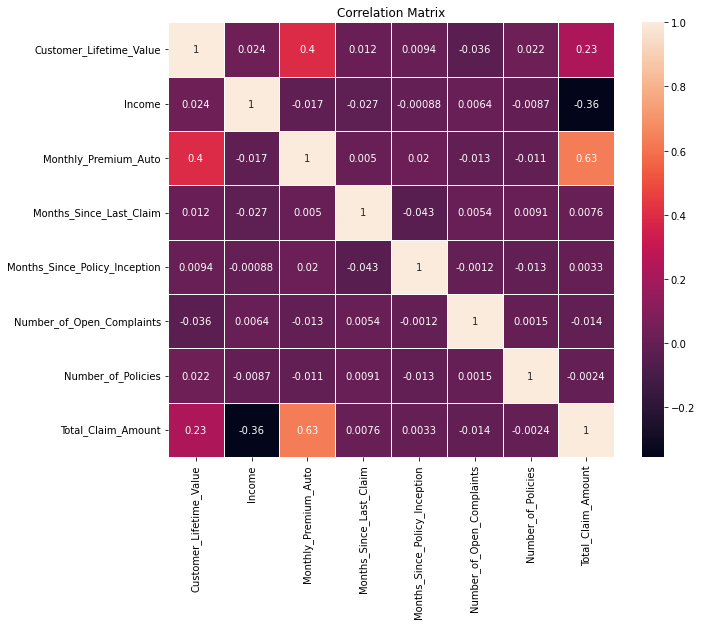

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

There are no variables that are too correlated which can cause multicolinearity. 

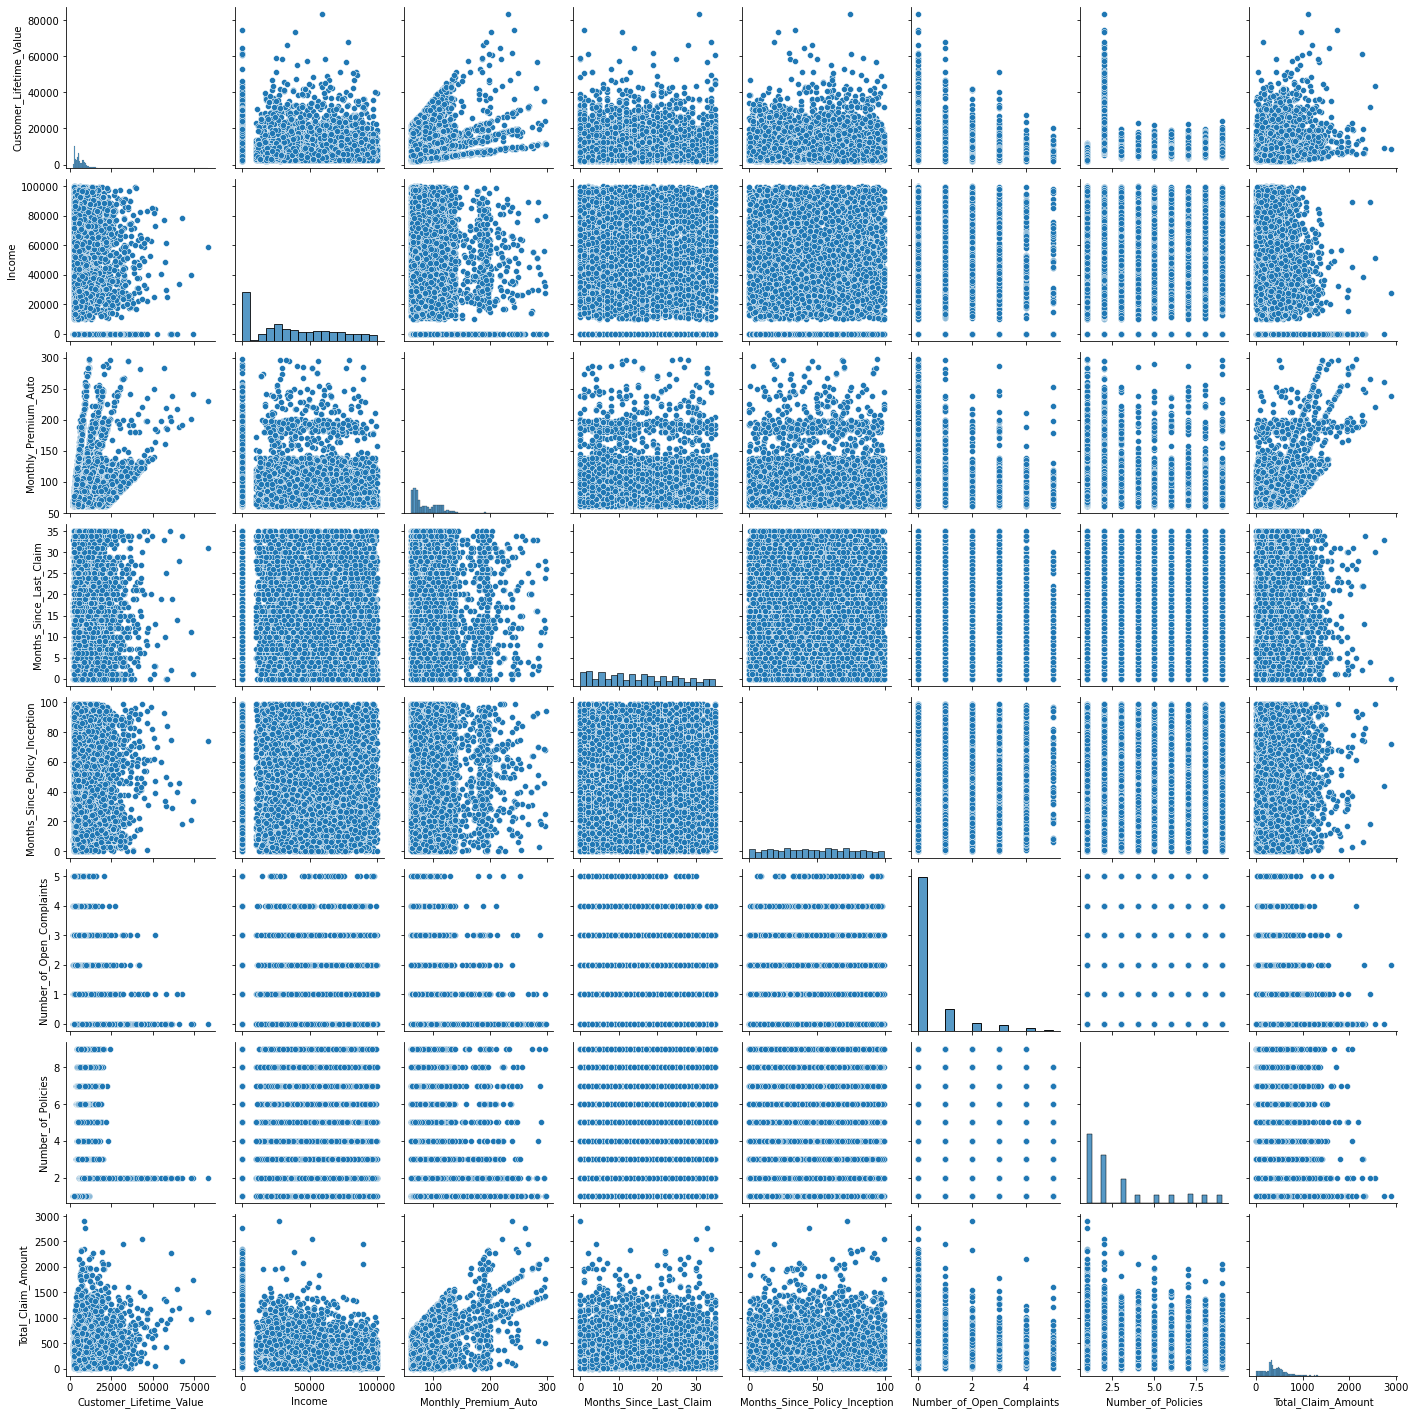

In [14]:
sns.pairplot(df)
plt.show()

The pairplot and heatmap indicate that there are no variables which are strongly correlated to each other. Hence, there is no need to drop any variables to avoid future problems.

<h1> 3. Model preparation for OLS </h1> <a name="select"> </a>

1.Defining your dependent (CLV) and independent variables <br>
2.For the indendent variables prepare categorical ones for the model, keep "Number_of_Policies","Total_Claim_Amount", "Number_of_Open_Complaints","EmploymentStatus","Coverage","Vehicle_Class" features <br>
3.Split the data into train and test sets, set the test_size=0.25, random_state=42 <br>

In [16]:
from sklearn.model_selection import train_test_split

# create new pandas DataFrame.
data_ols = df[["Customer_Lifetime_Value", "Number_of_Policies", "Total_Claim_Amount", "Number_of_Open_Complaints", "EmploymentStatus","Coverage","Vehicle_Class"]]
Y = data_ols.Customer_Lifetime_Value
X = data_ols.drop(["Customer_Lifetime_Value"],axis=1)

# getting dummies
X = pd.get_dummies(X,drop_first=True, dtype = "int")

# adding constraint to X
X = sm.add_constant(X)

# splitting the data into train and test sets
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)

<h1> 4. Running and building the OLS model /statsmodels/ (interpretation,test performance) </h1> <a name="stats">

1.Define the constant and fit trained data into the model <br>
2.Get the summary of the model <br>
3.Interpret the R-Squared value <br>
4.Interpret the significant coefficient of a continous variable <br>
5.Interpret the significant coefficient of a categorical variable <br>
6.Calculate the Mean Squared Error for train and test data, interpret the results <br>
7.Check the LINE assumptions using residual visual analysis, interpret the results <br>
8.Check the LINE assumptions using residual diagnostic tests, interpret the results (reject or fail to reject the H0) <br>

In [17]:
#fit trained data, observing the results with the help of summary

results = sm.OLS(Y0, X0).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer_Lifetime_Value   R-squared:                       0.159
Model:                                 OLS   Adj. R-squared:                  0.157
Method:                      Least Squares   F-statistic:                     92.06
Date:                     Sat, 23 Mar 2024   Prob (F-statistic):          1.44e-243
Time:                             22:40:04   Log-Likelihood:                -69574.
No. Observations:                     6850   AIC:                         1.392e+05
Df Residuals:                         6835   BIC:                         1.393e+05
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           5688.4156    396.172     14.358      0.000    4911.795    6465.036
Number_of_Policies                73.9376     31.419      2.353      0.019      12.347     135.529
Total_Claim_Amount                 0.0615      0.372      0.165      0.869      -0.668       0.791
Number_of_Open_Complaints       -276.9562     82.645     -3.351      0.001    -438.966    -114.947
EmploymentStatus_Employed        228.5676    367.922      0.621      0.534    -492.673     949.809
EmploymentStatus_Medical Leave   144.6735    495.520      0.292      0.770    -826.699    1116.046
EmploymentStatus_Retired        -486.6401    551.131     -0.883      0.377   -1567.029     593.749
EmploymentStatus_Unemployed     -378.4796    386.844     -0.978      0.328   -1136.815     379.856
Coverage_Extended               1483.9425    172.270      8.614      0.000    1146.240    1821.645
Coverage_Premium                3269.9832    284.037     11.513      0.000    2713.182    3826.785
Vehicle_Class_Luxury Car         1.06e+04    620.787     17.079      0.000    9385.499    1.18e+04
Vehicle_Class_Luxury SUV        1.016e+04    601.287     16.891      0.000    8977.715    1.13e+04
Vehicle_Class_SUV               3778.0220    216.083     17.484      0.000    3354.431    4201.613
Vehicle_Class_Sports Car        3725.7868    350.637     10.626      0.000    3038.430    4413.143
Vehicle_Class_Two-Door Car       172.4828    197.348      0.874      0.382    -214.381     559.346
==============================================================================
Omnibus:                     4203.519   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46454.831
Skew:                           2.816   Prob(JB):                         0.00
Kurtosis:                      14.447   Cond. No.                     5.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 - R-squared: R-squared is shows that 15.9% of variance in Customer_Lifetime_Value is explained by the variables included in the model. However, the model is not so consistent because R-squared is a small number, closer to 0. Hence, there are other factors that should be considered.
 - Coefficients (continous variable): For each unit increase in Number_of_Policies we will experience on average about 73.9376 increase in mean Customer_Lifetime_Value.
 - Coefficients (categorical variable): Let's interpret for EmploymentStatus. 
  - If a person is Employed, compared to the reference group (Disabled people), the Customer_Lifetime_Value will increase on average by 228.5676.
  - If a person is Medical Leave, compared to the reference group (Disabled people), the Customer_Lifetime_Value will increase on average by 144.6735.
  - If a person is Retired, compared to the reference group (Disabled people), the Customer_Lifetime_Value will decrease on average by 486.6401.
  - If a person is Unemployed, compared to the reference group (Disabled people), the Customer_Lifetime_Value will decrease on average by 378.4796.

In [18]:
from sklearn.metrics import mean_squared_error
# Make predictions using the model
y_train_pred = results.predict(X0)
y_test_pred = results.predict(X1)

# Calculate Mean Squared Error for train and test data
mse_train = mean_squared_error(Y0, y_train_pred)
mse_test = mean_squared_error(Y1, y_test_pred)

In [19]:
mse_train

38867621.35723964

In [20]:
mse_test

42661820.261231884

The MSE for the test data is higher than the MSE for the training data. This is expected since the model is likely to perform worse on unseen data. The higher MSE suggests that there is a larger prediction error when the model is applied to data it hasn't seen during training. 

In [21]:
#residuals of the model
residuals=results.resid
predicted_values=results.predict()

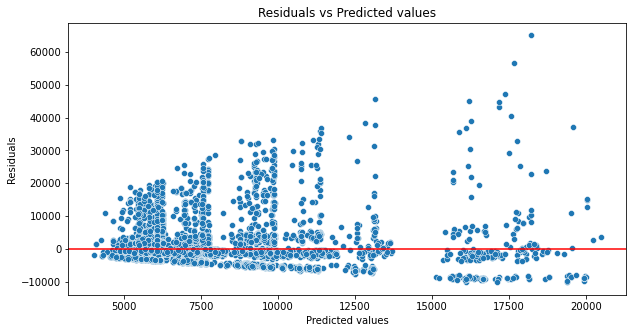

In [22]:
#lets plot predicted values vs residuals
plt.figure(figsize=(10,5))
sns.scatterplot(predicted_values,residuals)
plt.axhline(y=0, c="red")
plt.title("Residuals vs Predicted values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

According to the plot Linearity assumption is not held.

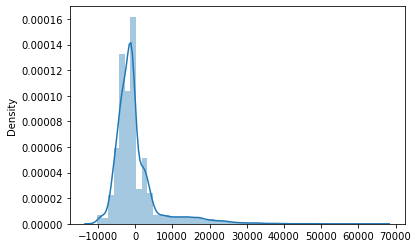

In [23]:
#Normality
sns.distplot(residuals)
plt.show()

According to the density plot and qqlot most probably the residuals don't come from normal distribution.

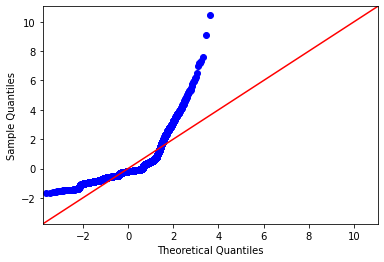

In [24]:
# QQ plot
qqplot(residuals,fit=True, line='45')
plt.show()

# Diagnostic tests for Linear Regression assumptions

In [25]:
#Linearity 
#The null hypothesis assumes that the regression is correctly modelled as linear
rnames=["fstat", "p-value"]
rainbow=linear_rainbow(results)
print(list(zip(rnames, rainbow)))

[('fstat', 1.1110967657308075), ('p-value', 0.0010413083418026464)]


Linearity assumption is not held at 5% significance level (p-value=0.0008<0.05).

In [26]:
#Breusch-Pagan test for homoscedasticity
#The null hypothesis assumes homoskedasticity

bnames = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
breush = het_breuschpagan(residuals, results.model.exog)
print(list(zip(bnames, breush)))

[('Lagrange multiplier statistic', 397.1288508662355), ('p-value', 5.1038482768899175e-76), ('f-value', 30.046156785297214), ('f p-value', 1.9854591938895895e-78)]


We reject the null hypothesis based on 5% significance level, thus homoscedasticity assumption is not held. (p-value=5.071334212242409e-42<0.05)

In [27]:
from scipy.stats import shapiro

#Shapiro-Wilk normality test. 
#The null-hypothesis of this test is that the data was drawn from a normal distribution
snames=['The test statistic', 'p-value']
shapirotest=shapiro(residuals)
print(list(zip(snames, shapirotest)))

[('The test statistic', 0.728191614151001), ('p-value', 0.0)]


Test confirms that the data was not drawn from a normal distribution.

<h1>5.Regularization methods </h1><a name="regs"></a>

<u>Implementing Regularization methods using the original data set</u> <br>
1.Prepare features for the model <br>
2.Define indipendent and dependent (CLV) variables <br>
3.Split the data into train and test sets, set the test_size=0.25, random_state=42  <br>
4.Set the possible penalty ranges <u>(alphas = 10**np.linspace(10,-2,100)*0.5)</u> <br>
5.Fit the Lasso, Ridge and Elasic Net models on train data with cross validation = 10 to find the best alpha (lambda),  <br>
6.Fit the Lasso, Ridge and Elasic Net models on train data with the best α (lambda) <br>
7.With α = 0 fit the OLS model on train data*  <br>
8.Compare the Mean Squared Error for test data for 4 models and interpret the results

In [28]:
data_numeric = df.select_dtypes(exclude=["object"])
data_object = df.select_dtypes(include=["object"])
data_full = pd.concat((data_numeric, pd.get_dummies(data_object, drop_first=True)), axis=1)
data_full= data_full.dropna()

Y=data_full["Customer_Lifetime_Value"]
X=data_full.drop("Customer_Lifetime_Value", axis=1)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [29]:
ridgecv = RidgeCV(alphas = alphas,cv = 10) # set the λ value range, cross validation, and normalization of Xs
ridgecv.fit(X_train, y_train) # fit the model on train data , normalize = True
ridgecv.alpha_ #get the best λ

352.74011553593226

In [30]:
ridge = Ridge(alpha = ridgecv.alpha_) #with the best λ continue the process
ridge.fit(X_train, y_train) # fit the model on train data
ridge_mse = mean_squared_error(y_test, ridge.predict(X_test))
ridge_mse

42666753.37996336

In [31]:
lassocv = LassoCV(alphas = alphas,cv = 10, normalize = True) # set the λ value range, cross validation, and normalization of Xs
lassocv.fit(X_train, y_train) # fit the model on train data
lassocv.alpha_ #get the best λ

0.7599555414764666

In [32]:
lasso = Lasso(alpha = lassocv.alpha_, normalize = True) #with the best λ continue the process
lasso.fit(X_train, y_train) # fit the model on train data
lasso_mse = mean_squared_error(y_test, lasso.predict(X_test))
lasso_mse

42600779.48912433

In [33]:
# Create an ElasticNetCV model to find optimal alpha and l1_ratio
elasticnetcv = ElasticNetCV(alphas=alphas, cv=10, max_iter=100000, normalize=True, l1_ratio=[0.1, 0.5, 0.7, 0.9])
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

0.005

In [34]:
# Create an ElasticNet model with the optimal alpha and l1_ratio
elastic_net = ElasticNet(alpha=elasticnetcv.alpha_, l1_ratio=elasticnetcv.l1_ratio_)

# Fit the Elastic Net model to the training data
elastic_net.fit(X_train, y_train)

# Evaluate the Elastic Net model on the test data
elastic_net_mse = mean_squared_error(y_test, elastic_net.predict(X_test))
elastic_net_mse

42800208.424952865

In [35]:
ols = Ridge(alpha = 0, normalize = True) #with the best λ continue the process
ols.fit(X_train, y_train) # fit the model on train data
ols_mse = mean_squared_error(y_test, ols.predict(X_test))
ols_mse

42811329.09130329

In [36]:
print("The MSE for Ridge Regression:",ridge_mse )
print("The MSE for Lasso Regression:",lasso_mse )
print("The MSE for Elastic_net Regression:",elastic_net_mse )
print("The MSE for OLS:",ols_mse)

The MSE for Ridge Regression: 42666753.37996336
The MSE for Lasso Regression: 42600779.48912433
The MSE for Elastic_net Regression: 42800208.424952865
The MSE for OLS: 42811329.09130329


All the regression models listed above have relatively high MSE values, suggesting that none of them are performing particularly well on the test data. It's possible that the models are not capturing the underlying relationships in the data effectively, and further analysis and model tuning may be needed to improve their performance. 